## Knowledge expansion and distillation


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading labeled data...
Original MFCCs length: 9986, Labels length: 9986
Aligned MFCCs length: 9986, Labels length: 9986
X shape: (9986, 130, 13), y shape: (9986,)
Generating pseudo-unlabeled data...
X_train shape: (6990, 130, 13, 1), X_val shape: (1498, 130, 13, 1), X_test shape: (1498, 130, 13, 1), Unlabeled shape: (9986, 130, 13, 1)
Loading pre-trained teacher model...


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 128, 11, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128, 11, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 64, 6, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 62, 4, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 62, 4, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 31, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 62, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,282 (524.54 KB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 384 (1.50 KB)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8165 - loss: 0.5854
Teacher Test Loss: 0.5728, Accuracy: 0.8284
Generating pseudo-labels...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Combined data shape: (16976, 130, 13, 1), Labels shape: (16976,)
Training student model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 130, 13, 256)   │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 130, 13, 256)   │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 65, 6, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 65, 6, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 65, 6, 512)     │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 65, 6, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 3, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 3, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,515,274 (5.78 MB)

 Trainable params: 1,513,738 (5.77 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.2156 - loss: 2.2192 - val_accuracy: 0.2150 - val_loss: 2.1923 - learning_rate: 1.0000e-04
Epoch 2/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.2021 - loss: 2.1810 - val_accuracy: 0.2530 - val_loss: 2.0986 - learning_rate: 1.0000e-04
Epoch 3/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.2375 - loss: 2.1029 - val_accuracy: 0.2590 - val_loss: 2.0483 - learning_rate: 1.0000e-04
Epoch 4/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.2625 - loss: 2.0565 - val_accuracy: 0.3231 - val_loss: 1.9873 - learning_rate: 1.0000e-04
Epoch 5/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.2929 - loss: 1.9934 - val_accuracy: 0.3371 - val_loss: 1.9093 - learning_rate: 1.0000e-04
Epoch 6/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.3000 - loss: 1.9520 - val_accuracy: 0.3585 - val_loss: 1.8674 - learning_rate: 1.0000e-04
Epoch 7/250
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 5

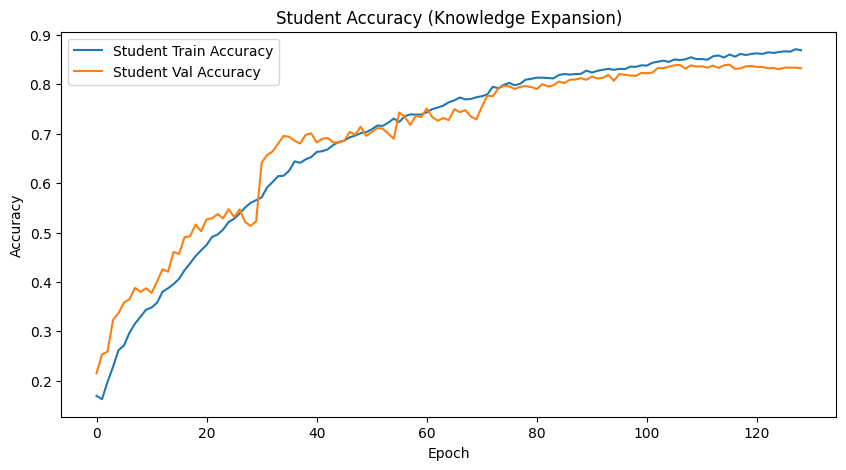

Student model saved to /content/drive/MyDrive/ked_student_nst.keras


In [ ]:
import tensorflow as tf
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, LSTM, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Verify T4 GPU
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Parameters
batch_size = 64
data_path = '/content/drive/MyDrive/data.json'  # Your data path
teacher_model_path = '/content/drive/MyDrive/crnn.keras'  # Your crnn.keras
student_model_save_path = '/content/drive/MyDrive/ked_student_nst.keras'  # For ensemble
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
num_classes = len(genres)

# Data augmentation for unlabeled data
def augment_mfcc(mfcc, noise_level=0.01):
    # Add Gaussian noise to MFCCs
    noise = np.random.normal(0, noise_level, mfcc.shape)
    mfcc_aug = mfcc + noise
    # Clip to prevent non-finite values
    mfcc_aug = np.clip(mfcc_aug, -1e6, 1e6)
    # Ensure shape (130, 13)
    return mfcc_aug[:130, :13]

# Load labeled data
print("Loading labeled data...")
with open(data_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract MFCCs and labels
mfccs = data['mfcc']
labels = data['genre_num']

# Validate and align data
print(f"Original MFCCs length: {len(mfccs)}, Labels length: {len(labels)}")
min_length = min(len(mfccs), len(labels))
mfccs = mfccs[:min_length]
labels = labels[:min_length]
print(f"Aligned MFCCs length: {len(mfccs)}, Labels length: {len(labels)}")

# Convert to NumPy arrays
X = np.array(mfccs)
y = np.array(labels)
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Check for non-finite values
if not np.isfinite(X).all():
    print("Warning: Non-finite values in MFCCs, replacing with zeros")
    X = np.where(np.isfinite(X), X, 0.0)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Generate pseudo-unlabeled data
print("Generating pseudo-unlabeled data...")
unlabeled_mfccs = np.array([augment_mfcc(mfcc) for mfcc in X])

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Add channel dimension
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]
unlabeled_mfccs = unlabeled_mfccs[..., np.newaxis]
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, X_test shape: {X_test.shape}, Unlabeled shape: {unlabeled_mfccs.shape}")

# Create tf.data datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Step 1: Load Teacher Model
print("Loading pre-trained teacher model...")
class CustomInputLayer(tf.keras.layers.InputLayer):
    def __init__(self, batch_shape=None, input_shape=None, **kwargs):
        if batch_shape is not None:
            input_shape = batch_shape[1:]
        kwargs['input_shape'] = input_shape
        for key in ['batch_shape', 'axes_shapes']:
            kwargs.pop(key, None)
        super().__init__(input_shape=input_shape, **kwargs)
try:
    teacher_model = load_model(teacher_model_path, custom_objects={'InputLayer': CustomInputLayer}, compile=False)
    teacher_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    teacher_model.summary()
except Exception as e:
    print(f"Error loading teacher model: {e}")
    raise

# Evaluate teacher
test_loss, test_accuracy = teacher_model.evaluate(test_dataset)
print(f"Teacher Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Step 2: Generate Pseudo-Labels
print("Generating pseudo-labels...")
pseudo_labels = teacher_model.predict(unlabeled_mfccs, batch_size=batch_size)
pseudo_labels_hard = np.argmax(pseudo_labels, axis=1)

# Combine labeled and pseudo-labeled data
X_combined = np.concatenate([X_train, unlabeled_mfccs])
y_combined = np.concatenate([y_train, pseudo_labels_hard])
print(f"Combined data shape: {X_combined.shape}, Labels shape: {y_combined.shape}")

# Create combined dataset
combined_dataset = tf.data.Dataset.from_tensor_slices((X_combined, y_combined)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Step 3: Define and Train Student Model (Knowledge Expansion)
def build_crnn_student(input_shape=(130, 13, 1), num_classes=10):
    model = Sequential([
        Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Reshape((-1, 512)),
        LSTM(128, return_sequences=False),
        Dropout(0.5),
        Dense(num_classes, activation='softmax', dtype='float32')
    ])
    return model

print("Training student model...")
student_model = build_crnn_student()
student_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
student_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history_student = student_model.fit(
    combined_dataset,
    validation_data=val_dataset,
    epochs=250,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate student
test_loss, test_accuracy = student_model.evaluate(test_dataset)
print(f"Student Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(history_student.history['accuracy'], label='Student Train Accuracy')
plt.plot(history_student.history['val_accuracy'], label='Student Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Student Accuracy (Knowledge Expansion)')
plt.show()

# Save student model
student_model.save(student_model_save_path)
print(f"Student model saved to {student_model_save_path}")